<a href="https://colab.research.google.com/github/Nish077/DC_GAN/blob/main/ganFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

In [ ]:
import zipfile
import os

# Path to your zip file
zip_path = 'zddtpgzv63-2.zip'
# Destination folder for extraction
extract_to = 'dataset/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")


Extraction complete!


In [ ]:
from __future__ import print_function
import time
import os
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

In [ ]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


2.6.0+cpu
0.21.0+cpu


Total dog pictures available: 4


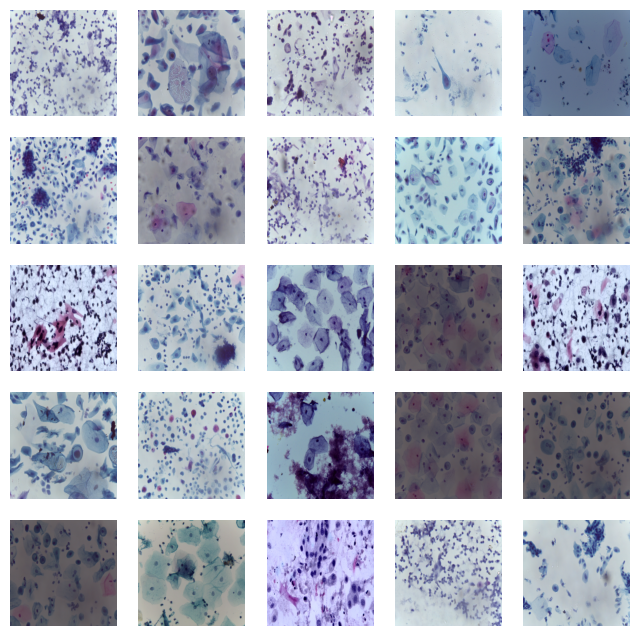

In [ ]:
import random
# Define the path to the directory containing dog images
PATH = "C:/Users/User/CellGAN/dataset"

# Get the list of image filenames in the directory
images = os.listdir(PATH)


# Create subplots to display random images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8,8))

# Iterate through the subplots and display random dog images
for indx, axis in enumerate(axes.flatten()):
    PATH_TEMP = random.choice(os.listdir(PATH))
    # Get a random index within the range of available images
    rnd_indx = np.random.randint(0, len(os.listdir(PATH+'/'+PATH_TEMP)))

    # Load and display the image using Matplotlib
    images = os.listdir(PATH+'/'+PATH_TEMP+'/')
    img = plt.imread(PATH+'/'+PATH_TEMP + '/'+images[rnd_indx])
    # Resize the image to a constant size (e.g., 64x64)

    img = resize(img, (400,400))
    imgplot = axis.imshow(img)
    axis.set_axis_off()  # Turn off the axis for better visualization



In [ ]:
batch_size = 32
image_size = 64

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder(PATH, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.96862745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5137255..0.8666667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.254902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5764706..0.7490196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.4039216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.7882353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.32549024].
Clipping

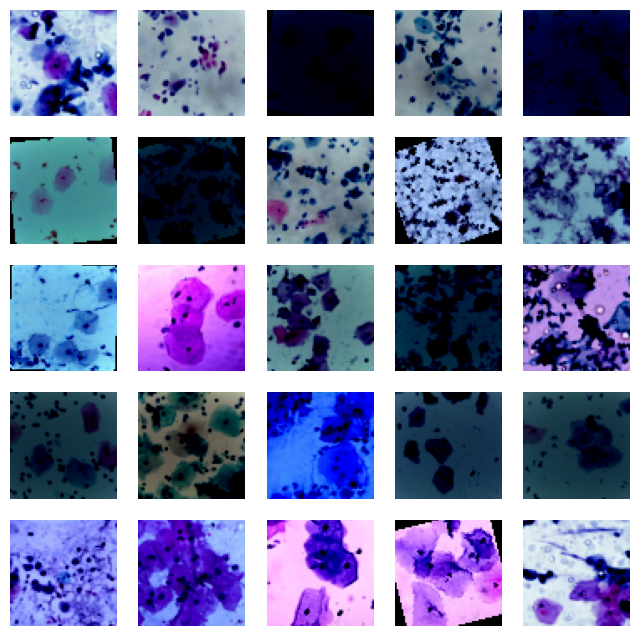

In [ ]:
fig, axs = plt.subplots(5,5, figsize = (8,8))

for i in range(5):
    for j in range(5):
        axs[i,j].imshow(imgs[5*i+j])
        axs[i,j].axis('off')

plt.show()

# Weights
### Defining the weights_init function

In [ ]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

# Generator

In [ ]:
class G(nn.Module):
    def __init__(self):
        # Used to inherit the torch.nn Module
        super(G, self).__init__()
        # Meta Module - consists of different layers of Modules
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )

    def forward(self, input):
        output = self.main(input)
        return output

# Creating the generator
netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

# Discriminator

In [ ]:
# Defining the discriminator
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )

    def forward(self, input):
        output = self.main(input)
        # .view(-1) = Flattens the output into 1D instead of 2D
        return output.view(-1)


# Creating the discriminator
netD = D()
netD.apply(weights_init)


D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

## Another setup

In [ ]:
class Generator(nn.Module):
    def __init__(self, nz=128, channels=3):
        super(Generator, self).__init__()

        self.nz = nz
        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block

        self.model = nn.Sequential(
            *convlayer(self.nz, 1024, 4, 1, 0), # Fully connected layer via convolution.
            *convlayer(1024, 512, 4, 2, 1),
            *convlayer(512, 256, 4, 2, 1),
            *convlayer(256, 128, 4, 2, 1),
            *convlayer(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1)
        img = self.model(z)
        return img


class Discriminator(nn.Module):
    def __init__(self, channels=3):
        super(Discriminator, self).__init__()

        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *convlayer(self.channels, 32, 4, 2, 1),
            *convlayer(32, 64, 4, 2, 1),
            *convlayer(64, 128, 4, 2, 1, bn=True),
            *convlayer(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),  # FC with Conv.
        )

    def forward(self, imgs):
        logits = self.model(imgs)
        out = torch.sigmoid(logits)

        return out.view(-1, 1)

# Training

In [ ]:
!mkdir results
!ls

A subdirectory or file results already exists.
'ls' is not recognized as an internal or external command,
operable program or batch file.


### Parameters

In [ ]:
batch_size = 32
LR_G = 0.001
LR_D = 0.0005

beta1 = 0.5
epochs = 2750

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


### Initialize models and optimizers

In [ ]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

**Plot Loss per EPOCH**
> plot_loss()

In [ ]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

**Show generated images**
> show_generated_img()

In [ ]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)

    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)

    plt.show()
    plt.close()

### Training Loop

In [ ]:
import torch
import time

# Assume 'netG', 'netD', 'optimizerG', 'optimizerD' are already defined

epoch_time = []
G_losses = []
D_losses = []

# If you want to load from a previous checkpoint, set checkpoint_path
# checkpoint_path = 'checkpoint_epoch_250.pth'  # Path to the checkpoint file
# epoch, G_losses, D_losses = load_checkpoint(checkpoint_path, netG, netD, optimizerG, optimizerD)

for epoch in range(epochs):
    start = time.time()
    for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        if (ii + 1) % (len(train_loader) // 2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii + 1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

    # Save checkpoint every 250 epochs
    if epoch % 100 == 0:
        checkpoint = {
            'epoch': epoch + 1,
            'netG_state_dict': netG.state_dict(),
            'netD_state_dict': netD.state_dict(),
            'optimizerG_state_dict': optimizerG.state_dict(),
            'optimizerD_state_dict': optimizerD.state_dict(),
            'G_losses': G_losses,
            'D_losses': D_losses
        }
        checkpoint_path = f"C:/Users/User/CellGAN/checkpoints/checkpoint_epoch_{epoch + 1}.pth"
        torch.save(checkpoint, checkpoint_path)
        print(f"Checkpoint saved to {checkpoint_path}")

    # Reset losses for next epoch
    G_losses = []
    D_losses = []
    if epoch % 100 == 0:
        show_generated_img()
    epoch_time.append(time.time() - start)




In [ ]:
print (">> average EPOCH duration = ", np.mean(epoch_time))

>> average EPOCH duration =  64.19734229469299


# Generation example


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.937363].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999998..0.9797539].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999262..0.7866993].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99998575..0.8704859].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9583216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9999941..0.9082884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99999654..0.854157

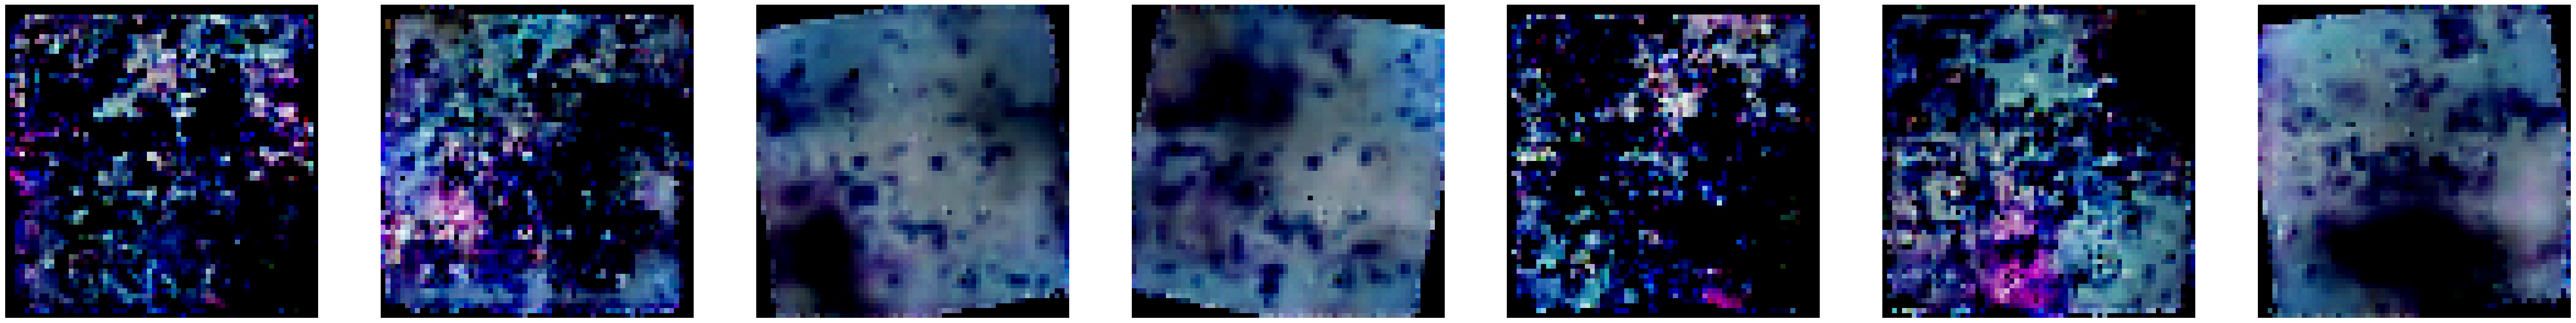

In [ ]:
show_generated_img(7)

In [ ]:
if not os.path.exists('C:/Users/User/CellGAN/output_images'):
    os.mkdir('C:/Users/User/CellGAN/output_images')

im_batch_size = 50
n_images=10000

for i_batch in tqdm(range(0, n_images, im_batch_size)):
    gen_z = torch.randn(im_batch_size, nz, 1, 1, device=device)
    gen_images = netG(gen_z)
    images = gen_images.to("cpu").clone().detach()
    images = images.numpy().transpose(0, 2, 3, 1)
    for i_image in range(gen_images.size(0)):
        save_image(gen_images[i_image, :, :, :], os.path.join('C:/Users/User/CellGAN/output_images', f'image_{i_batch+i_image:05d}.png'))

C:\Users\User\AppData\Local\Temp\ipykernel_10832\3218895561.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i_batch in tqdm(range(0, n_images, im_batch_size)):


  0%|          | 0/200 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.91042155..0.93658805].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8770315..0.9058672].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.91602206..0.4881017].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9997357..0.8200204].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6916583..0.32500598].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6855826..0.82973546].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9

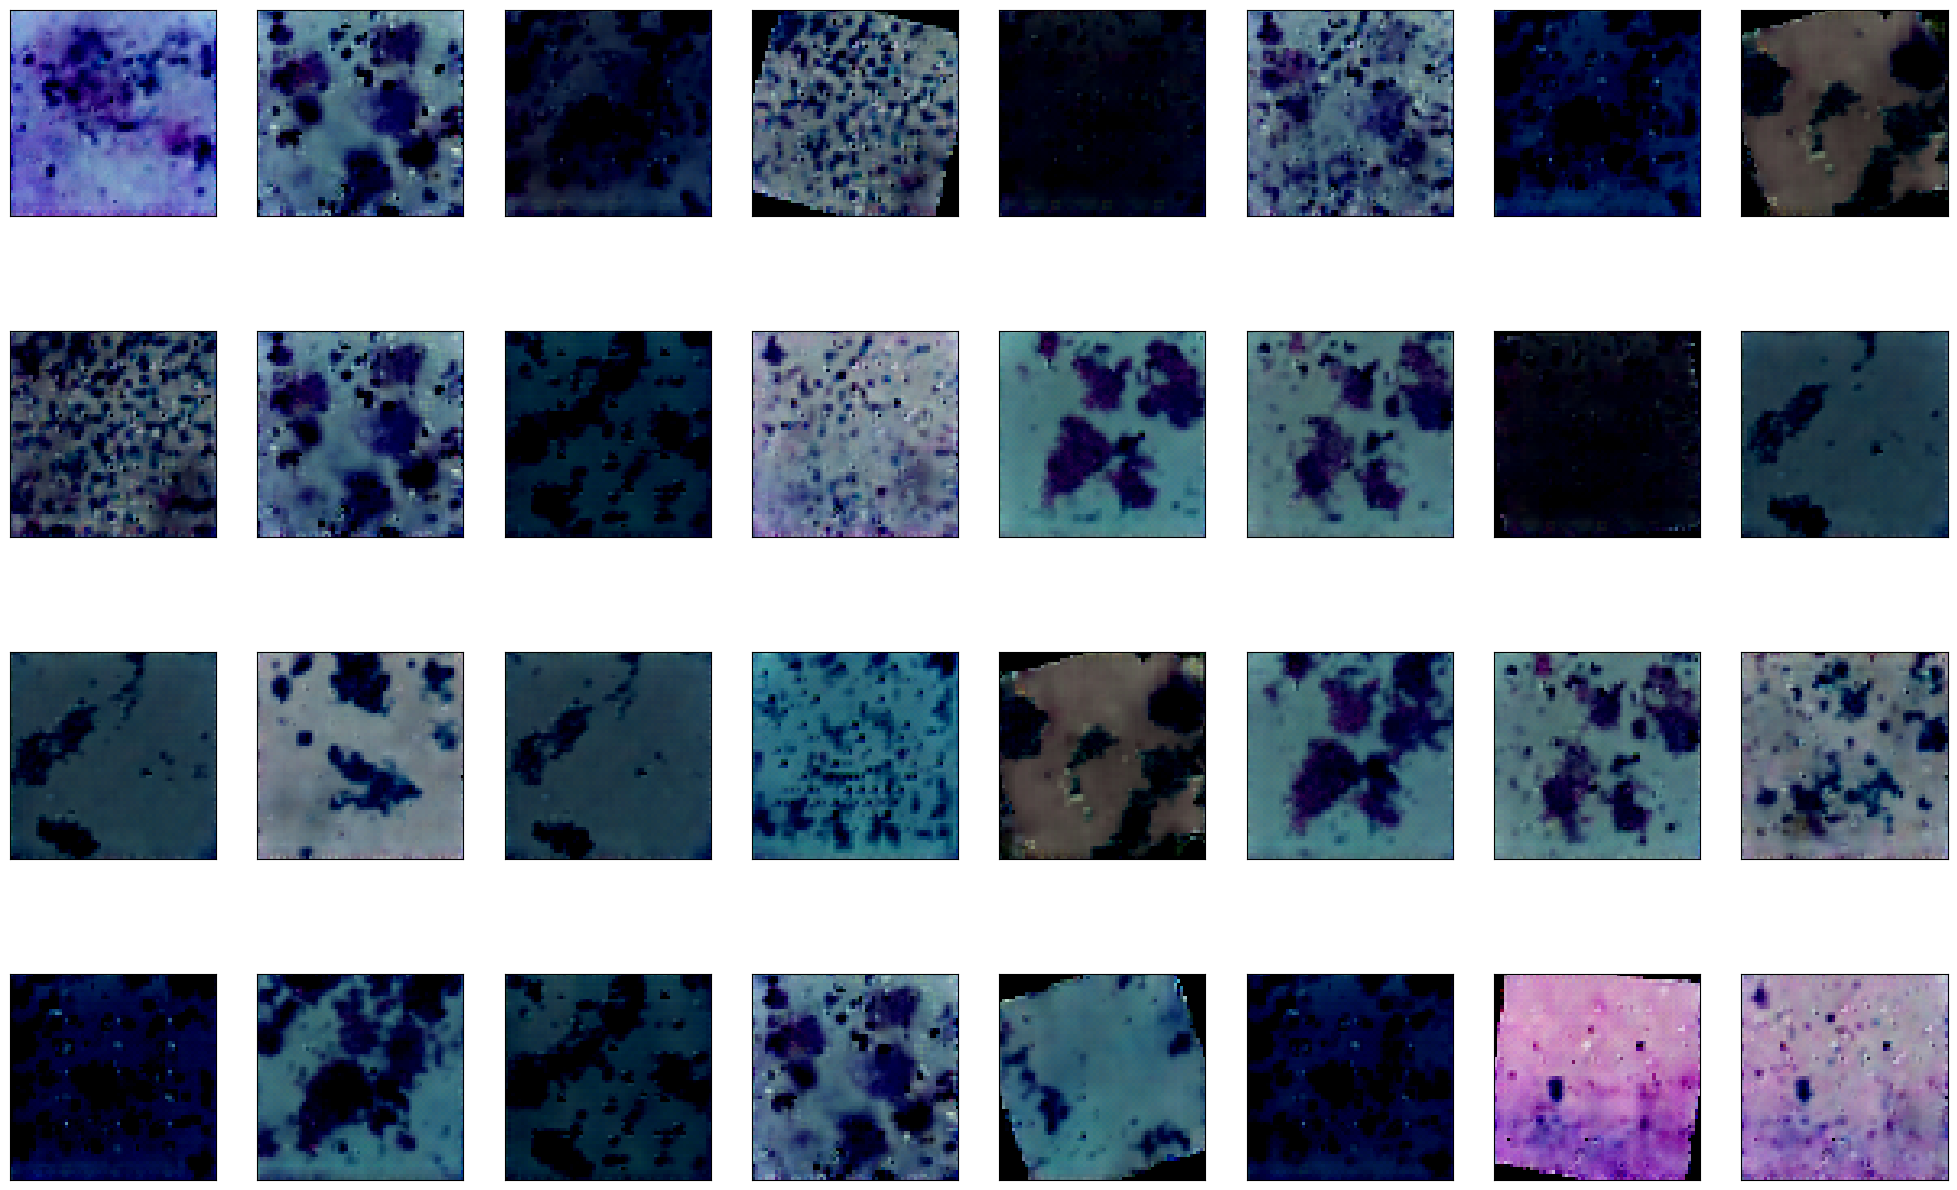

In [ ]:
fig = plt.figure(figsize=(25, 16))
# display 10 images from each class
for i, j in enumerate(images[:32]):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(j)

In [ ]:
torch.save(netG.state_dict(), 'C:/Users/User/CellGAN/generator_model.pth')
torch.save(netD.state_dict(), 'C:/Users/User/CellGAN/discriminator_model.pth')

In [ ]:
import os
from tqdm import tqdm

def generate_and_save_images(netG, nz, num_images_per_class=5, output_dir='"E:\Deep Learning\sem2 project\images"'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    netG.to(device)
    netG.eval()  # Set the model to evaluation mode
    num_classes = 1 # Assuming single class case

    for class_label in range(num_classes):
        class_dir = os.path.join(output_dir, f"class_{class_label}")
        os.makedirs(class_dir, exist_ok=True)

        for i in tqdm(range(num_images_per_class), desc=f"Generating images for class {class_label}"):
            noise = torch.randn(1, nz, 1, 1, device=device)  # Generate random noise
            with torch.no_grad():  # No gradient calculation needed during generation
                generated_image = netG(noise)
            save_image(generated_image, os.path.join(class_dir, f"image_{i}.png"))
generate_and_save_images(netG, nz)

NameError: name 'netG' is not defined

In [ ]:
generator_path = "C:/Users/User/CellGAN/generator_model.pth"
generator = torch.load(generator_path, map_location=device)

print("Checkpoint type:", type(generator))  # Check if it's a dict or state_dict
if isinstance(generator, dict):
    print("Checkpoint keys:", generator.keys())  # Print available keys


Checkpoint type: <class 'collections.OrderedDict'>
Checkpoint keys: odict_keys(['model.0.weight', 'model.1.weight', 'model.1.bias', 'model.1.running_mean', 'model.1.running_var', 'model.1.num_batches_tracked', 'model.3.weight', 'model.4.weight', 'model.4.bias', 'model.4.running_mean', 'model.4.running_var', 'model.4.num_batches_tracked', 'model.6.weight', 'model.7.weight', 'model.7.bias', 'model.7.running_mean', 'model.7.running_var', 'model.7.num_batches_tracked', 'model.9.weight', 'model.10.weight', 'model.10.bias', 'model.10.running_mean', 'model.10.running_var', 'model.10.num_batches_tracked', 'model.12.weight', 'model.13.weight', 'model.13.bias', 'model.13.running_mean', 'model.13.running_var', 'model.13.num_batches_tracked', 'model.15.weight', 'model.15.bias'])


In [ ]:
import torch
import torch.nn as nn

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the Generator model (Make sure its architecture matches the saved weights!)
netG = Generator(nz=128, channels=3).to(device)

# Load the generator model weights
generator_path = "C:/Users/User/CellGAN/generator_model.pth"
checkpoint = torch.load(generator_path, map_location=device)

# Load directly since it's an OrderedDict (not wrapped inside a dictionary)
netG.load_state_dict(checkpoint)

# Set model to evaluation mode
netG.eval()

print("✅ Checkpoint successfully loaded!")


✅ Checkpoint successfully loaded!


In [ ]:
#orignal modified code
import os
from tqdm import tqdm
import torch
from torchvision.utils import save_image

def generate_and_save_images(netG, nz, num_images_per_class=500, output_dir='C:/Users/User/CellGAN/new64'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    netG.to(device)
    netG.eval()  # Set the model to evaluation mode

    # List of class labels
    class_labels = [
        "High squamous intra-epithelial lesion",
        "Low squamous intra-epithelial lesion",
        "Negative for Intraepithelial malignancy",
        "Squamous cell carcinoma"
    ]

    # Number of classes
    num_classes = len(class_labels)

    for class_label in range(num_classes):
        class_name = class_labels[class_label]
        class_dir = os.path.join(output_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

        for i in tqdm(range(num_images_per_class), desc=f"Generating images for {class_name}"):
            noise = torch.randn(1, nz, 1, 1, device=device)  # Generate random noise
            with torch.no_grad():  # No gradient calculation needed during generation
                generated_image = netG(noise)

            # Save the generated image to the appropriate class folder
            save_image(generated_image, os.path.join(class_dir, f"image_{i}.png"))

# Example usage
generate_and_save_images(netG, nz)


Generating images for High squamous intra-epithelial lesion: 100%|██████████| 500/500 [00:11<00:00, 45.14it/s]
Generating images for Low squamous intra-epithelial lesion: 100%|██████████| 500/500 [00:10<00:00, 48.22it/s]
Generating images for Negative for Intraepithelial malignancy: 100%|██████████| 500/500 [00:10<00:00, 49.11it/s]
Generating images for Squamous cell carcinoma: 100%|██████████| 500/500 [00:10<00:00, 49.21it/s]


In [ ]:
img=plt.imread()


In [ ]:
netG.eval()

# Define latent space size (adjust based on your model)
LATENT_DIM = 128

# Function to Generate Images
def generate_images(generator, num_images=500, class_name="Generated"):
    os.makedirs(f"/content/gan images/{class_name}", exist_ok=True)

    # Generate noise vector
    noise = torch.randn(num_images, LATENT_DIM, 1, 1, device="cuda" if torch.cuda.is_available() else "cpu")

    # Generate images (PyTorch forward pass)
    with torch.no_grad():
        generated_images = generator(noise).cpu()

    # Save images
    for i in range(num_images):
        img = generated_images[i].permute(1, 2, 0).numpy()  # Convert to (H, W, C)
        img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0,1]
        plt.imshow(img)
        plt.axis("off")
        plt.savefig(f"/content/gan images/{class_name}/image_{i}.png")
        plt.close()

# Generate 5 Images for Each Class
for class_name in ["High squamous intra-epithelial lesion", "Low squamous intra-epithelial lesion",
                   "Negative for Intraepithelial malignancy", "Squamous cell carcinoma"]:
    generate_images(netG, num_images=500, class_name=class_name)

print("Images Generated Successfully!")

Images Generated Successfully!


In [ ]:
#classification



In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os

# Define transformations for the images (resize and normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet-18 requires 224x224 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Path to the folder where your class directories are saved
data_dir = 'C:/Users/User/CellGAN/new64'

# Load dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split dataset into train and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
from torchvision import models

# Load the pre-trained ResNet-18 model with the updated 'weights' argument
from torchvision.models import ResNet18_Weights

model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)  # or ResNet18_Weights.DEFAULT


In [ ]:
import torch.nn as nn
from torchvision import models

# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Modify the final fully connected layer to match the number of classes (4 classes in your case)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 4)  # 4 classes in the final layer

# Move the model to the device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10  # Set the number of epochs

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        # Training loop
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()  # Zero the gradients

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass
            loss.backward()
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total

        # Validation loop
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                val_loss += loss.item()

        val_loss = val_loss / len(val_loader)
        val_acc = val_correct / val_total

        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch [1/10], Train Loss: 1.5490, Train Acc: 0.2419, Val Loss: 1.4344, Val Acc: 0.2525
Epoch [2/10], Train Loss: 1.4082, Train Acc: 0.2406, Val Loss: 1.4427, Val Acc: 0.2250
Epoch [3/10], Train Loss: 1.4367, Train Acc: 0.2381, Val Loss: 1.4337, Val Acc: 0.2450
Epoch [4/10], Train Loss: 1.4201, Train Acc: 0.2531, Val Loss: 1.5319, Val Acc: 0.2250
Epoch [5/10], Train Loss: 1.4181, Train Acc: 0.2594, Val Loss: 1.4044, Val Acc: 0.2600
Epoch [6/10], Train Loss: 1.4125, Train Acc: 0.2581, Val Loss: 1.5270, Val Acc: 0.2250
Epoch [7/10], Train Loss: 1.4126, Train Acc: 0.2581, Val Loss: 1.4073, Val Acc: 0.2325
Epoch [8/10], Train Loss: 1.4019, Train Acc: 0.2537, Val Loss: 1.4087, Val Acc: 0.2550
Epoch [9/10], Train Loss: 1.4130, Train Acc: 0.2569, Val Loss: 1.4080, Val Acc: 0.2400
Epoch [10/10], Train Loss: 1.4069, Train Acc: 0.2344, Val Loss: 1.4492, Val Acc: 0.2425


In [ ]:

from PIL import Image
from torchvision import transforms

# Load the image you want to classify
img = Image.open('C:/Users/User/CellGAN/new64')

# Define the same transformation as during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply the transformation to the image
img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension and move to device

# Get predictions
model.eval()
with torch.no_grad():
    outputs = model(img_tensor)
    _, predicted = torch.max(outputs, 1)

# Get the predicted class label
class_labels = [
    "High squamous intra-epithelial lesion",
    "Low squamous intra-epithelial lesion",
    "Negative for Intraepithelial malignancy",
    "Squamous cell carcinoma"
]

print(f"Predicted class: {class_labels[predicted.item()]}")


PermissionError: [Errno 13] Permission denied: 'C:/Users/User/CellGAN/new64'